In [1]:
import pandas as pd
import numpy as np
from keras import models, layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras import metrics
from keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [41]:
pd.set_option('display.max_columns', None)

In [73]:
df = pd.read_csv(r'C:\Users\alexl\Desktop\matchwithstats10_20.csv')

In [42]:
df

,Tourney Name,Tourney Date,Tourney Level,Surface,Draw size,Round,Minutes,Player1,Player1_ID,Player1_rank,Player2,Player2_ID,Player2_rank,Winner,Player_ID,Winning_%,Ace,DoubleFault,FirstServeMade,FirstServeWon,SecondServeMade,SecondServeWon,BreakPointSaved,Player_ID2,Winning_%2,Ace2,DoubleFault2,FirstServeMade2,FirstServeWon2,SecondServeMade2,SecondServeWon2,BreakPointSaved2
0,Brisbane,2010-01-03,A,Hard,32,R32,84.0,Andy Roddick,104053,7.0,Peter Luczak,103429,77.0,1,104053,100.000000,15.606936,0.867052,75.144509,78.461538,24.855491,65.116279,73.333333,103429,0.000000,7.142857,3.571429,60.714286,85.294118,39.285714,50.000000,60.000000
1,Brisbane,2010-01-03,A,Hard,32,R32,70.0,Mischa Zverev,104999,78.0,Carsten Ball,104958,134.0,2,104999,0.000000,3.030303,3.030303,51.515152,64.705882,48.484848,43.750000,70.000000,104958,50.000000,14.400000,4.800000,52.800000,74.242424,47.200000,62.711864,87.500000
2,Brisbane,2010-01-03,A,Hard,32,R32,121.0,Richard Gasquet,104755,52.0,Jarkko Nieminen,103813,88.0,1,104755,66.666667,7.623318,3.587444,56.502242,74.603175,43.497758,54.639175,75.000000,103813,0.000000,4.705882,0.000000,68.235294,65.517241,31.764706,51.851852,63.636364
3,Brisbane,2010-01-03,A,Hard,32,R32,64.0,Jurgen Melzer,103781,28.0,Matthew Ebden,105051,285.0,2,103781,0.000000,3.773585,1.886792,54.716981,55.172414,45.283019,62.500000,40.000000,105051,50.000000,16.190476,0.952381,67.619048,73.239437,32.380952,61.764706,66.666667
4,Brisbane,2010-01-03,A,Hard,32,R32,69.0,Tomas Berdych,104607,20.0,Nick Lindahl,105194,251.0,1,104607,75.000000,9.677419,1.792115,54.480287,78.289474,45.519713,58.267717,77.272727,105194,0.000000,8.695652,1.449275,59.420290,63.414634,40.579710,50.000000,66.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27870,Davis Cup WG1 PO: UKR vs TPE,2020-03-06,D,Hard,4,RR,153.0,Sergiy Stakhovsky,104660,167.0,Tung Lin Wu,126555,232.0,1,104660,25.000000,9.596662,3.894298,61.613352,70.428894,38.386648,52.536232,64.062500,126555,50.000000,6.547619,2.380952,61.309524,67.961165,38.690476,52.307692,75.000000
27871,Davis Cup WG1 PO: UKR vs TPE,2020-03-06,D,Hard,4,RR,76.0,Illya Marchenko,105011,207.0,Chun Hsin Tseng,202358,279.0,1,105011,50.000000,11.403509,4.385965,57.017544,73.846154,42.982456,51.020408,55.555556,202358,33.333333,5.194805,2.597403,60.606061,69.285714,39.393939,47.252747,73.333333
27872,Davis Cup WG1 PO: VEN vs NZL,2020-03-06,D,Hard,4,RR,79.0,Finn Tearney,110686,1018.0,Jordi Munoz Abreu,105467,1234.0,1,110686,0.000000,5.000000,13.333333,68.333333,73.170732,31.666667,42.105263,71.428571,105467,0.000000,1.923077,3.846154,73.076923,55.263158,26.923077,57.142857,50.000000
27873,Davis Cup WG1 PO: VEN vs NZL,2020-03-06,D,Hard,4,RR,137.0,Ajeet Rai,208055,915.0,Luis David Martinez,105334,NaN,2,208055,0.000000,8.571429,4.761905,53.333333,71.428571,46.666667,38.775510,66.666667,105334,0.000000,4.651163,1.162791,65.116279,71.428571,34.883721,56.666667,62.500000


# Diff

In [5]:
data = pd.read_csv(r'C:\Users\alexl\Desktop\matchwithstats10_20.csv')

In [6]:
data = data.drop(['Player1_ID', 'Player2_ID','Player_ID','Player_ID2','Tourney Name', 'Tourney Date'], axis = 1)

In [7]:
data['diff_Winning_%'] = data['Winning_%'] - data['Winning_%2']
data['diff_Ace'] = data['Ace'] - data['Ace2']
data['diff_DoubleFault'] = data['DoubleFault'] - data['DoubleFault2']

data['diff_FirstServeMade'] = data['FirstServeMade'] - data['FirstServeMade2']
data['diff_FirstServeWon'] = data['FirstServeWon'] - data['FirstServeWon2']

data['diff_SecondServeMade'] = data['SecondServeMade'] - data['SecondServeMade2']
data['diff_SecondServeWon'] = data['SecondServeWon'] - data['SecondServeWon2']

data['diff_BreakPointSaved'] = data['BreakPointSaved'] - data['BreakPointSaved2']

data['diff_Rank'] = data['Player2_rank'] - data['Player1_rank']

In [8]:
data = data.drop(['Winning_%', 'Ace', 'DoubleFault', 'FirstServeMade',
       'FirstServeWon', 'SecondServeMade', 'SecondServeWon', 'BreakPointSaved',
       'Winning_%2', 'Ace2', 'DoubleFault2', 'FirstServeMade2',
       'FirstServeWon2', 'SecondServeMade2', 'SecondServeWon2',
       'BreakPointSaved2', 'Player1', 'Player2','Player1_rank', 'Player2_rank'],axis=1)

In [9]:
data

,Tourney Level,Surface,Draw size,Round,Minutes,Winner,diff_Winning_%,diff_Ace,diff_DoubleFault,diff_FirstServeMade,diff_FirstServeWon,diff_SecondServeMade,diff_SecondServeWon,diff_BreakPointSaved,diff_Rank
0,A,Hard,32,R32,84.0,1,100.000000,8.464079,-2.704377,14.430223,-6.832579,-14.430223,15.116279,13.333333,70.0
1,A,Hard,32,R32,70.0,2,-50.000000,-11.369697,-1.769697,-1.284848,-9.536542,1.284848,-18.961864,-17.500000,56.0
2,A,Hard,32,R32,121.0,1,66.666667,2.917436,3.587444,-11.733052,9.085933,11.733052,2.787323,11.363636,36.0
3,A,Hard,32,R32,64.0,2,-50.000000,-12.416891,0.934412,-12.902066,-18.067023,12.902066,0.735294,-26.666667,257.0
4,A,Hard,32,R32,69.0,1,75.000000,0.981767,0.342839,-4.940003,14.874840,4.940003,8.267717,10.606061,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27870,D,Hard,4,RR,153.0,1,-25.000000,3.049043,1.513345,0.303828,2.467729,-0.303828,0.228540,-10.937500,65.0
27871,D,Hard,4,RR,76.0,1,16.666667,6.208704,1.788562,-3.588517,4.560440,3.588517,3.767661,-17.777778,72.0
27872,D,Hard,4,RR,79.0,1,0.000000,3.076923,9.487179,-4.743590,17.907574,4.743590,-15.037594,21.428571,216.0
27873,D,Hard,4,RR,137.0,2,0.000000,3.920266,3.599114,-11.782946,0.000000,11.782946,-17.891156,4.166667,NaN


### Dummification 

In [10]:
data = pd.get_dummies(data, columns=['Round','Surface','Tourney Level'])

In [39]:
data.dtypes

Draw size                 int64
Minutes                 float64
Winner                    int64
diff_Winning_%          float64
diff_Ace                float64
diff_DoubleFault        float64
diff_FirstServeMade     float64
diff_FirstServeWon      float64
diff_SecondServeMade    float64
diff_SecondServeWon     float64
diff_BreakPointSaved    float64
diff_Rank               float64
Round_BR                  uint8
Round_F                   uint8
Round_QF                  uint8
Round_R128                uint8
Round_R16                 uint8
Round_R32                 uint8
Round_R64                 uint8
Round_RR                  uint8
Round_SF                  uint8
Surface_Carpet            uint8
Surface_Clay              uint8
Surface_Grass             uint8
Surface_Hard              uint8
Tourney Level_A           uint8
Tourney Level_D           uint8
Tourney Level_F           uint8
Tourney Level_G           uint8
Tourney Level_M           uint8
dtype: object

In [43]:
data

,Draw size,Minutes,Winner,diff_Winning_%,diff_Ace,diff_DoubleFault,diff_FirstServeMade,diff_FirstServeWon,diff_SecondServeMade,diff_SecondServeWon,diff_BreakPointSaved,diff_Rank,Round_BR,Round_F,Round_QF,Round_R128,Round_R16,Round_R32,Round_R64,Round_RR,Round_SF,Surface_Carpet,Surface_Clay,Surface_Grass,Surface_Hard,Tourney Level_A,Tourney Level_D,Tourney Level_F,Tourney Level_G,Tourney Level_M
0,32,84.0,1,100.000000,8.464079,-2.704377,14.430223,-6.832579,-14.430223,15.116279,13.333333,70.0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
1,32,70.0,0,-50.000000,-11.369697,-1.769697,-1.284848,-9.536542,1.284848,-18.961864,-17.500000,56.0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
2,32,121.0,1,66.666667,2.917436,3.587444,-11.733052,9.085933,11.733052,2.787323,11.363636,36.0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
3,32,64.0,0,-50.000000,-12.416891,0.934412,-12.902066,-18.067023,12.902066,0.735294,-26.666667,257.0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
4,32,69.0,1,75.000000,0.981767,0.342839,-4.940003,14.874840,4.940003,8.267717,10.606061,231.0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27868,4,122.0,0,-8.333333,4.401857,1.296895,1.007291,1.143180,-1.007291,5.283485,-9.270833,112.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
27869,4,94.0,0,0.000000,4.855890,2.005013,-4.291980,5.884989,4.291980,-1.287284,-19.444444,25.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
27870,4,153.0,1,-25.000000,3.049043,1.513345,0.303828,2.467729,-0.303828,0.228540,-10.937500,65.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
27871,4,76.0,1,16.666667,6.208704,1.788562,-3.588517,4.560440,3.588517,3.767661,-17.777778,72.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


In [12]:
data.Winner.replace([1, 2], [1, 0], inplace=True)

In [13]:
df_W = data.loc[:, data.columns != 'Winner']
df_W.columns

Index(['Draw size', 'Minutes', 'diff_Winning_%', 'diff_Ace',
       'diff_DoubleFault', 'diff_FirstServeMade', 'diff_FirstServeWon',
       'diff_SecondServeMade', 'diff_SecondServeWon', 'diff_BreakPointSaved',
       'diff_Rank', 'Round_BR', 'Round_F', 'Round_QF', 'Round_R128',
       'Round_R16', 'Round_R32', 'Round_R64', 'Round_RR', 'Round_SF',
       'Surface_Carpet', 'Surface_Clay', 'Surface_Grass', 'Surface_Hard',
       'Tourney Level_A', 'Tourney Level_D', 'Tourney Level_F',
       'Tourney Level_G', 'Tourney Level_M'],
      dtype='object')

In [14]:
len(data)

27875

In [15]:
#drop missing values
data = data.dropna()

# Test Train Split

In [16]:
array = data.values

In [17]:
X = array[:, data.columns != 'Winner']

In [18]:
y = array[:,data.columns == 'Winner']

In [19]:
y = y.ravel()

In [20]:
y =np.array(y).astype(int)

In [21]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

# ANN

In [28]:
network = models.Sequential()
network.add(layers.Dense(units=64, activation='relu', input_shape=(len(df_W.columns),)))
network.add(layers.Dense(units=32, activation='relu'))
network.add(layers.Dense(units=1, activation='sigmoid'))

network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=500)
mc = ModelCheckpoint(r'C:\Users\alexl\Desktop\best_model.h5', monitor='val_loss', mode='min', verbose=2, save_best_only=True)

history = network.fit(X_train, y_train, 
            epochs=1000, verbose=0, batch_size=128, 
            validation_data=(X_test, y_test), callbacks=[es, mc]) 

saved_model = load_model(r'C:\Users\alexl\Desktop\best_model.h5')


Epoch 00001: val_loss improved from inf to 0.53865, saving model to C:\Users\alexl\Desktop\best_model.h5

Epoch 00002: val_loss did not improve from 0.53865

Epoch 00003: val_loss improved from 0.53865 to 0.53497, saving model to C:\Users\alexl\Desktop\best_model.h5

Epoch 00004: val_loss did not improve from 0.53497

Epoch 00005: val_loss improved from 0.53497 to 0.52013, saving model to C:\Users\alexl\Desktop\best_model.h5

Epoch 00006: val_loss did not improve from 0.52013

Epoch 00007: val_loss did not improve from 0.52013

Epoch 00008: val_loss did not improve from 0.52013

Epoch 00009: val_loss did not improve from 0.52013

Epoch 00010: val_loss improved from 0.52013 to 0.51967, saving model to C:\Users\alexl\Desktop\best_model.h5

Epoch 00011: val_loss did not improve from 0.51967

Epoch 00012: val_loss improved from 0.51967 to 0.51701, saving model to C:\Users\alexl\Desktop\best_model.h5

Epoch 00013: val_loss did not improve from 0.51701

Epoch 00014: val_loss did not improve


Epoch 00154: val_loss did not improve from 0.51701

Epoch 00155: val_loss did not improve from 0.51701

Epoch 00156: val_loss did not improve from 0.51701

Epoch 00157: val_loss did not improve from 0.51701

Epoch 00158: val_loss did not improve from 0.51701

Epoch 00159: val_loss did not improve from 0.51701

Epoch 00160: val_loss did not improve from 0.51701

Epoch 00161: val_loss did not improve from 0.51701

Epoch 00162: val_loss did not improve from 0.51701

Epoch 00163: val_loss did not improve from 0.51701

Epoch 00164: val_loss did not improve from 0.51701

Epoch 00165: val_loss did not improve from 0.51701

Epoch 00166: val_loss did not improve from 0.51701

Epoch 00167: val_loss did not improve from 0.51701

Epoch 00168: val_loss did not improve from 0.51701

Epoch 00169: val_loss did not improve from 0.51701

Epoch 00170: val_loss did not improve from 0.51701

Epoch 00171: val_loss did not improve from 0.51701

Epoch 00172: val_loss did not improve from 0.51701

Epoch 00173


Epoch 00312: val_loss did not improve from 0.51701

Epoch 00313: val_loss did not improve from 0.51701

Epoch 00314: val_loss did not improve from 0.51701

Epoch 00315: val_loss did not improve from 0.51701

Epoch 00316: val_loss did not improve from 0.51701

Epoch 00317: val_loss did not improve from 0.51701

Epoch 00318: val_loss did not improve from 0.51701

Epoch 00319: val_loss did not improve from 0.51701

Epoch 00320: val_loss did not improve from 0.51701

Epoch 00321: val_loss did not improve from 0.51701

Epoch 00322: val_loss did not improve from 0.51701

Epoch 00323: val_loss did not improve from 0.51701

Epoch 00324: val_loss did not improve from 0.51701

Epoch 00325: val_loss did not improve from 0.51701

Epoch 00326: val_loss did not improve from 0.51701

Epoch 00327: val_loss did not improve from 0.51701

Epoch 00328: val_loss did not improve from 0.51701

Epoch 00329: val_loss did not improve from 0.51701

Epoch 00330: val_loss did not improve from 0.51701

Epoch 00331


Epoch 00470: val_loss did not improve from 0.51701

Epoch 00471: val_loss did not improve from 0.51701

Epoch 00472: val_loss did not improve from 0.51701

Epoch 00473: val_loss did not improve from 0.51701

Epoch 00474: val_loss did not improve from 0.51701

Epoch 00475: val_loss did not improve from 0.51701

Epoch 00476: val_loss did not improve from 0.51701

Epoch 00477: val_loss did not improve from 0.51701

Epoch 00478: val_loss did not improve from 0.51701

Epoch 00479: val_loss did not improve from 0.51701

Epoch 00480: val_loss did not improve from 0.51701

Epoch 00481: val_loss did not improve from 0.51701

Epoch 00482: val_loss did not improve from 0.51701

Epoch 00483: val_loss did not improve from 0.51701

Epoch 00484: val_loss did not improve from 0.51701

Epoch 00485: val_loss did not improve from 0.51701

Epoch 00486: val_loss did not improve from 0.51701

Epoch 00487: val_loss did not improve from 0.51701

Epoch 00488: val_loss did not improve from 0.51701

Epoch 00489

In [35]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


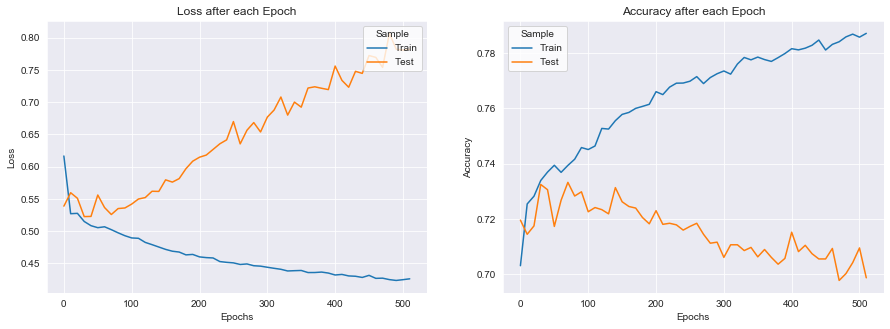

In [50]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Loss after each Epoch')
plt.plot(history.epoch[::10], history.history['loss'][::10], label='Train')
plt.plot(history.epoch[::10], history.history['val_loss'][::10], label='Test')
plt.legend(['Train', 'Test'],loc='upper right', title='Sample', facecolor='white',fancybox=True)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.title('Accuracy after each Epoch')
plt.plot(history.epoch[::10], history.history['accuracy'][::10], label='Train')
plt.plot(history.epoch[::10], history.history['val_accuracy'][::10], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left', title='Sample', facecolor='white', fancybox=True)

In [53]:
saved_model = load_model(r'C:\Users\alexl\Desktop\best_model.h5')

In [54]:
saved_model

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, saved_model.predict_classes(X_test)))
print(confusion_matrix(y_test, saved_model.predict_classes(X_test)))
print('Accuracy score is:',metrics.accuracy_score(y_test, saved_model.predict_classes(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.42      0.51      1775
           1       0.75      0.89      0.81      3492

    accuracy                           0.73      5267
   macro avg       0.70      0.65      0.66      5267
weighted avg       0.72      0.73      0.71      5267

[[ 753 1022]
 [ 400 3092]]
Accuracy score is: 0.730017087526106


In [57]:
y_pred_ann = saved_model.predict_proba(X_test)
auc_score = metrics.roc_auc_score(y_test, y_pred_ann)
print('AUC is:', auc_score)

AUC is: 0.781682558120775


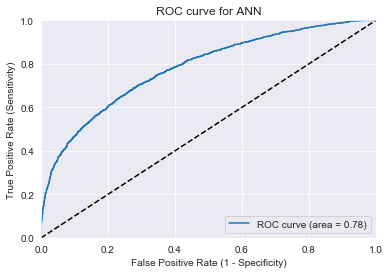

In [58]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ann)
fig = plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for ANN')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

In [68]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])


In [69]:
result_table = result_table.append({'classifiers':'Artificial Neural Network',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc_score}, ignore_index=True)

In [70]:
result_table

,classifiers,fpr,tpr,auc
0,Artificial Neural Network,"[0.0, 0.0, 0.0, 0.0005633802816901409, 0.00056...","[0.0, 0.000286368843069874, 0.0280641466208476...",0.781683


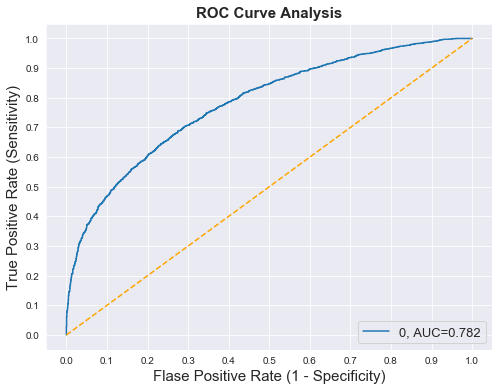

In [76]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate (1 - Specificity)", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate (Sensitivity)", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [75]:
result_table.to_csv(r'C:\Users\alexl\Desktop\result_table.csv',index=False)